# PRELIMINARIES

In [2]:
!pip install stegano

In [3]:
# PRELIMINARIES
import os
from stegano import lsb #USED FOR PNG IMAGE
import skimage.io as sk
import matplotlib.pyplot as plt
from scipy import spatial
from tqdm import tqdm

from PIL import Image
from random import shuffle


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Exploration

In [5]:
BASE_PATH = "/kaggle/input/alaska2-image-steganalysis"
train_imageids = pd.Series(os.listdir(BASE_PATH + '/Cover')).sort_values(ascending=True).reset_index(drop=True)
test_imageids = pd.Series(os.listdir(BASE_PATH + '/Test')).sort_values(ascending=True).reset_index(drop=True)

In [6]:
cover_images_path = pd.Series(BASE_PATH + '/Cover/' + train_imageids ).sort_values(ascending=True)
JMIPOD_images_path = pd.Series(BASE_PATH + '/JMiPOD/'+train_imageids).sort_values(ascending=True)
JUNIWARD_images_path = pd.Series(BASE_PATH + '/JUNIWARD/'+train_imageids).sort_values(ascending=True)
UERD_images_path = pd.Series(BASE_PATH + '/UERD/'+train_imageids).sort_values(ascending=True)
test_images_path = pd.Series(BASE_PATH + '/Test/'+test_imageids).sort_values(ascending=True)
ss = pd.read_csv(f'{BASE_PATH}/sample_submission.csv')

* UNIWARD -  Universal Wavelet Relative Distortion<br>
Paper describing CNN for stegnalysis of [JUNIWARD images](https://arxiv.org/ftp/arxiv/papers/1704/1704.08378.pdf)
 
* JMiPOD -
 Paper describing CNN for stegnalysis of [JMiPOD images](https://hal-utt.archives-ouvertes.fr/hal-02542075/file/J_MiPOD_vPub.pdf)
 
* UERD - Uniform Embedding Revisited Distortion
<br> No resources found yet , I will update as soon as I find something

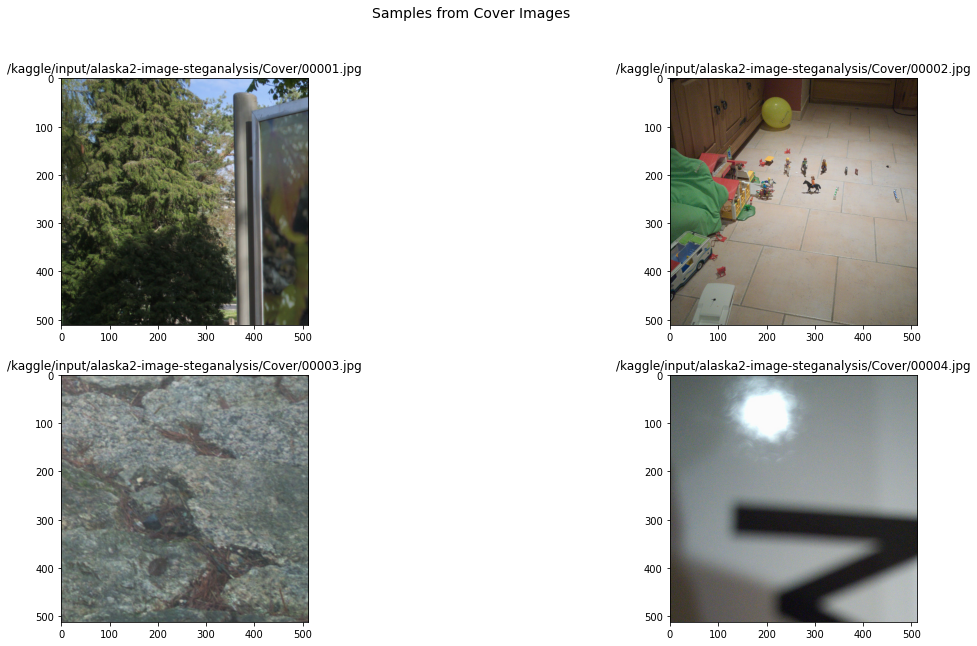

In [16]:
#VISUALIZING SOME IMAGES FROM COVER SECTION
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
k=0
for i, row in enumerate(ax):
    for j, col in enumerate(row):
        img = sk.imread(cover_images_path[k])
        col.imshow(img)
        col.set_title(cover_images_path[k])
        k=k+1
plt.suptitle('Samples from Cover Images', fontsize=14)
plt.show()

## Visualizing Cover and Encoded side by side

Let's visualize cover image and encoded images side by side

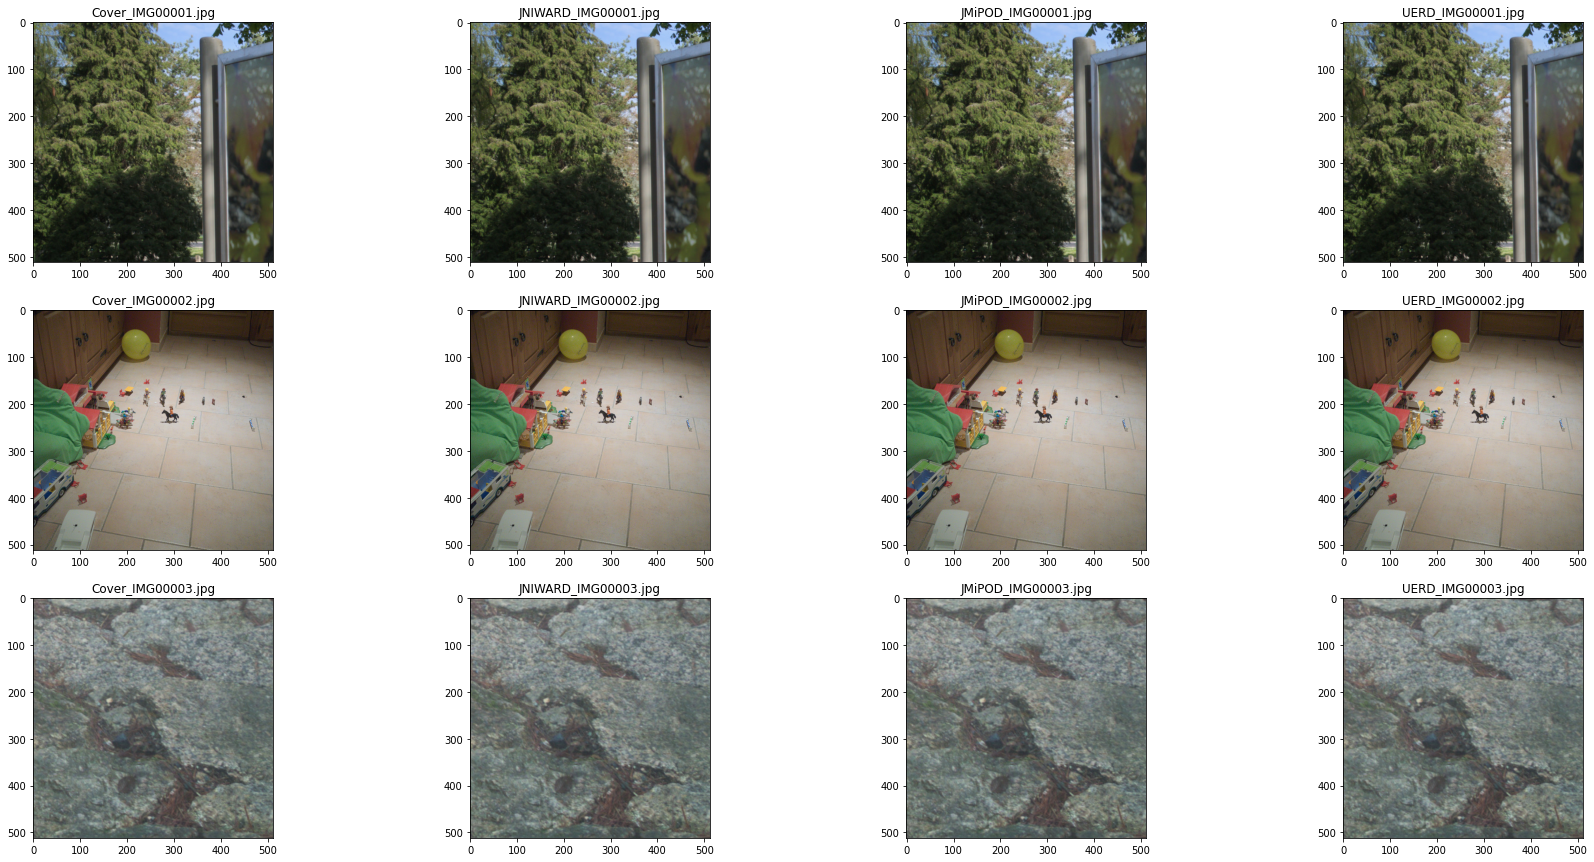

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30, 15))
for i in range(3):
    '''
    If you want to print more images just change the values in range and ncols in subplot
    
    '''
    cvimg = sk.imread(cover_images_path[i])
    uniimg = sk.imread(JUNIWARD_images_path[i])
    jpodimg = sk.imread(JMIPOD_images_path[i])
    uerdimg = sk.imread(UERD_images_path[i])
    
    ax[i,0].imshow(cvimg)
    ax[i,0].set_title('Cover_IMG'+train_imageids[i])
    ax[i,1].imshow(uniimg)
    ax[i,1].set_title('JNIWARD_IMG'+train_imageids[i])
    ax[i,2].imshow(jpodimg)
    ax[i,2].set_title('JMiPOD_IMG'+train_imageids[i])
    ax[i,3].imshow(uerdimg)
    ax[i,3].set_title('UERD_IMG'+train_imageids[i])

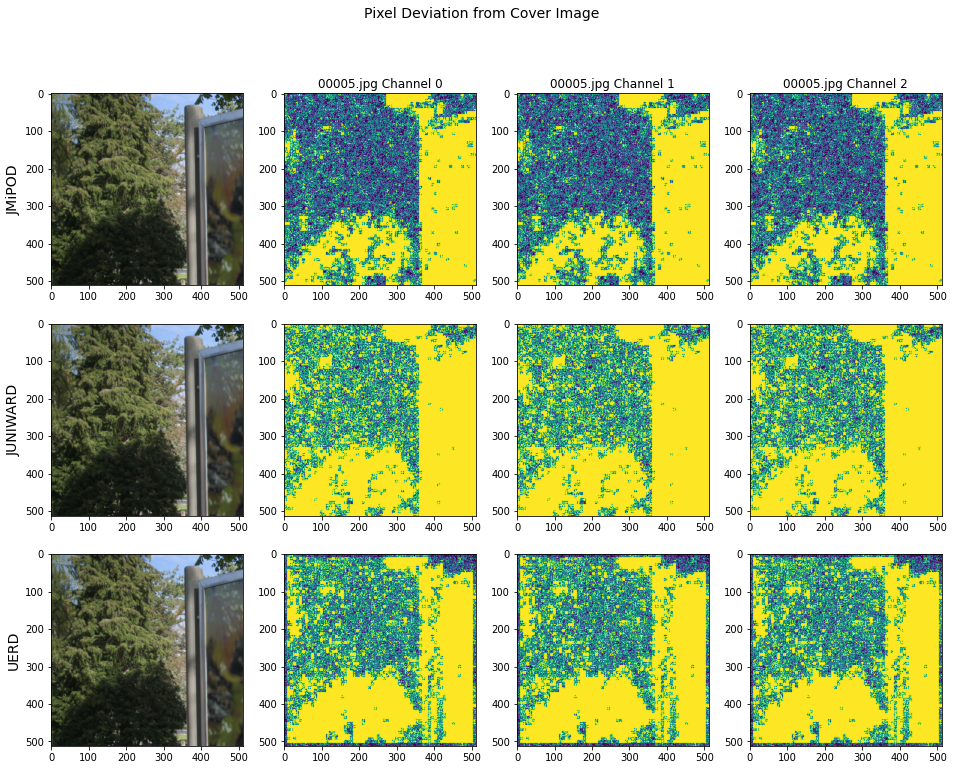

In [18]:
img_cover = sk.imread(cover_images_path[0])
img_jmipod = sk.imread(JMIPOD_images_path[0])
img_juniward = sk.imread(JUNIWARD_images_path[0])
img_uerd = sk.imread(UERD_images_path[0])


fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
ax[0,0].imshow(img_jmipod)
ax[0,1].imshow((img_cover == img_jmipod).astype(int)[:,:,0])
ax[0,1].set_title(f'{train_imageids[k]} Channel 0')

ax[0,2].imshow((img_cover == img_jmipod).astype(int)[:,:,1])
ax[0,2].set_title(f'{train_imageids[k]} Channel 1')
ax[0,3].imshow((img_cover == img_jmipod).astype(int)[:,:,2])
ax[0,3].set_title(f'{train_imageids[k]} Channel 2')
ax[0,0].set_ylabel('JMiPOD', rotation=90, size='large', fontsize=14)


ax[1,0].imshow(img_juniward)
ax[1,1].imshow((img_cover == img_juniward).astype(int)[:,:,0])
ax[1,2].imshow((img_cover == img_juniward).astype(int)[:,:,1])
ax[1,3].imshow((img_cover == img_juniward).astype(int)[:,:,2])
ax[1,0].set_ylabel('JUNIWARD', rotation=90, size='large', fontsize=14)

ax[2,0].imshow(img_uerd)
ax[2,1].imshow((img_cover == img_uerd).astype(int)[:,:,0])
ax[2,2].imshow((img_cover == img_uerd).astype(int)[:,:,1])
ax[2,3].imshow((img_cover == img_uerd).astype(int)[:,:,2])
ax[2,0].set_ylabel('UERD', rotation=90, size='large', fontsize=14)

plt.suptitle('Pixel Deviation from Cover Image', fontsize=14)

plt.show()

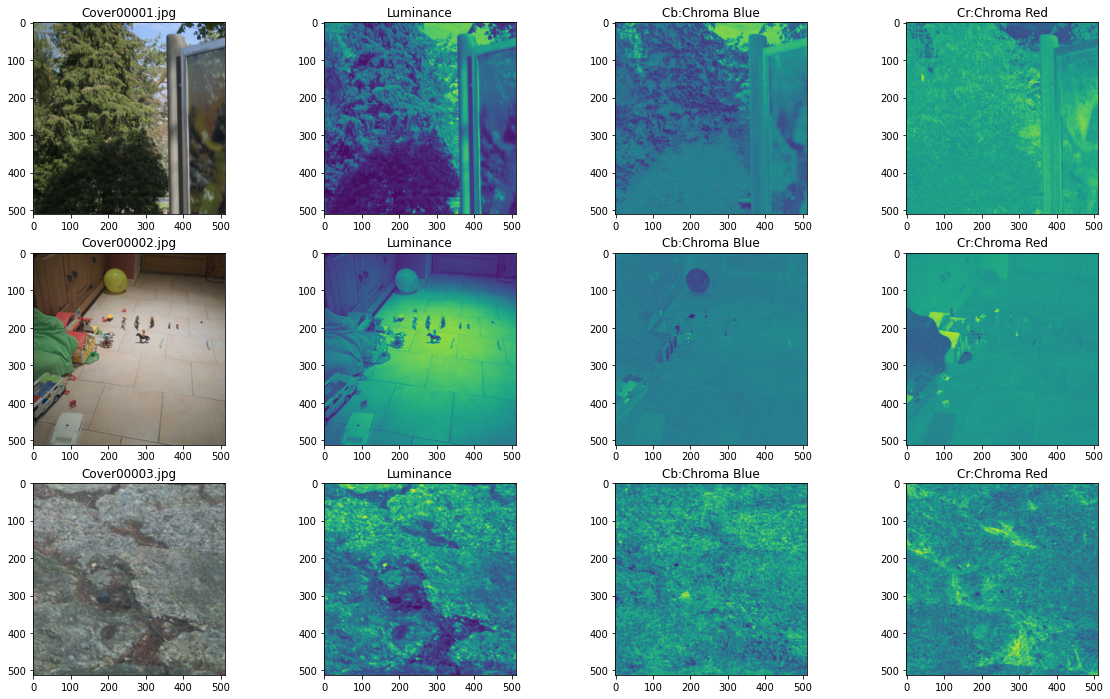

In [19]:
fig,ax = plt.subplots(3,4,figsize=(20,12))

for i,paths in enumerate(cover_images_path[:3]):
    image = Image.open(paths)
    ycbcr = image.convert('YCbCr')
    (y, cb, cr) = ycbcr.split()

    ax[i,0].imshow(image)
    ax[i,0].set_title('Cover'+train_imageids[i])
    ax[i,1].imshow(y)
    ax[i,1].set_title('Luminance')
    ax[i,2].imshow(cb)
    ax[i,2].set_title('Cb:Chroma Blue')
    ax[i,3].imshow(cr)
    ax[i,3].set_title('Cr:Chroma Red')

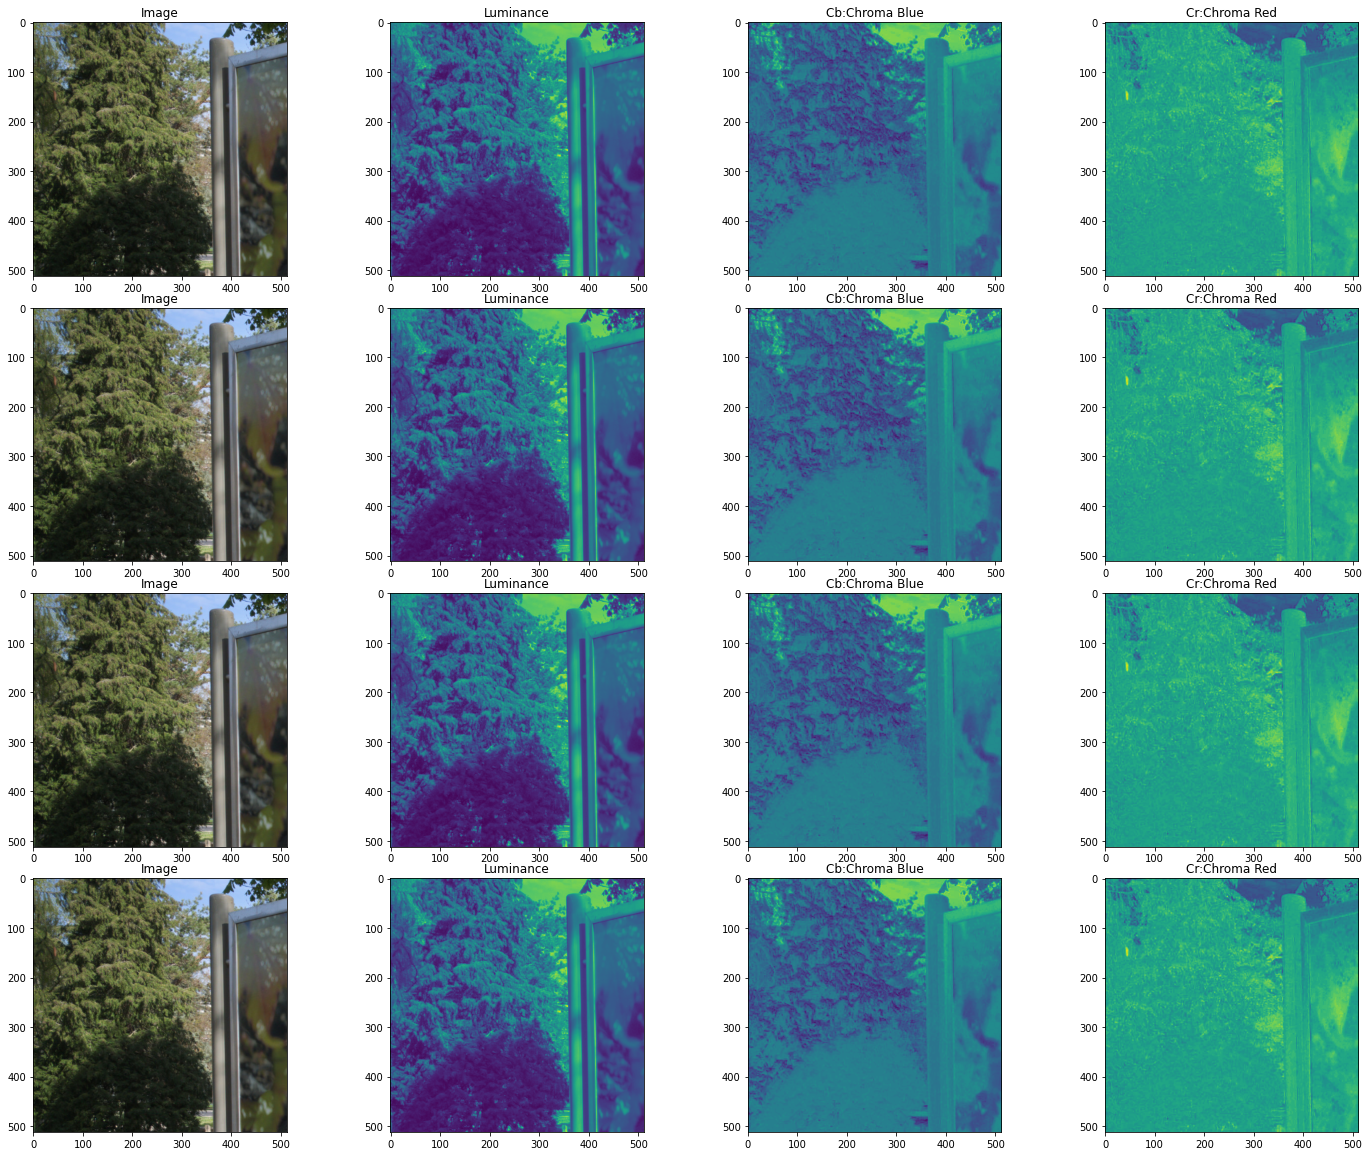

In [20]:
fig,ax = plt.subplots(4,4,figsize=(20,16))
plt.tight_layout()


im1 = Image.open(cover_images_path[0])
im2 = Image.open(JUNIWARD_images_path[0])
im3 = Image.open(JMIPOD_images_path[0])
im4 = Image.open(UERD_images_path[0])

for i,image in enumerate([im1,im2,im3,im4]):
    ycbcr = image.convert('YCbCr')
    (y, cb, cr) = ycbcr.split()

    ax[i,0].imshow(image)
    ax[i,0].set_title('Image')
    ax[i,1].imshow(y)
    ax[i,1].set_title('Luminance')
    ax[i,2].imshow(cb)
    ax[i,2].set_title('Cb:Chroma Blue')
    ax[i,3].imshow(cr)
    ax[i,3].set_title('Cr:Chroma Red')

In [21]:
! git clone https://github.com/dwgoon/jpegio

Cloning into 'jpegio'...
remote: Enumerating objects: 1408, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 1408 (delta 124), reused 212 (delta 101), pack-reused 1154
Receiving objects: 100% (1408/1408), 231.74 MiB | 65.09 MiB/s, done.
Resolving deltas: 100% (699/699), done.


In [22]:
!pip install jpegio/.
import jpegio as jio

Processing ./jpegio
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for jpegio: filename=jpegio-0.2.4-cp36-cp36m-linux_x86_64.whl size=1093473 sha256=23844efb5b4703abec615ac3546065c98d3935b1620f380b00c2c551b11a6241
  Stored in directory: /tmp/pip-ephem-wheel-cache-_25c4wm5/wheels/54/2a/87/ff10bf28eed3b259b9440e28f712256553794c91f64659a0cb
Successfully built jpegio


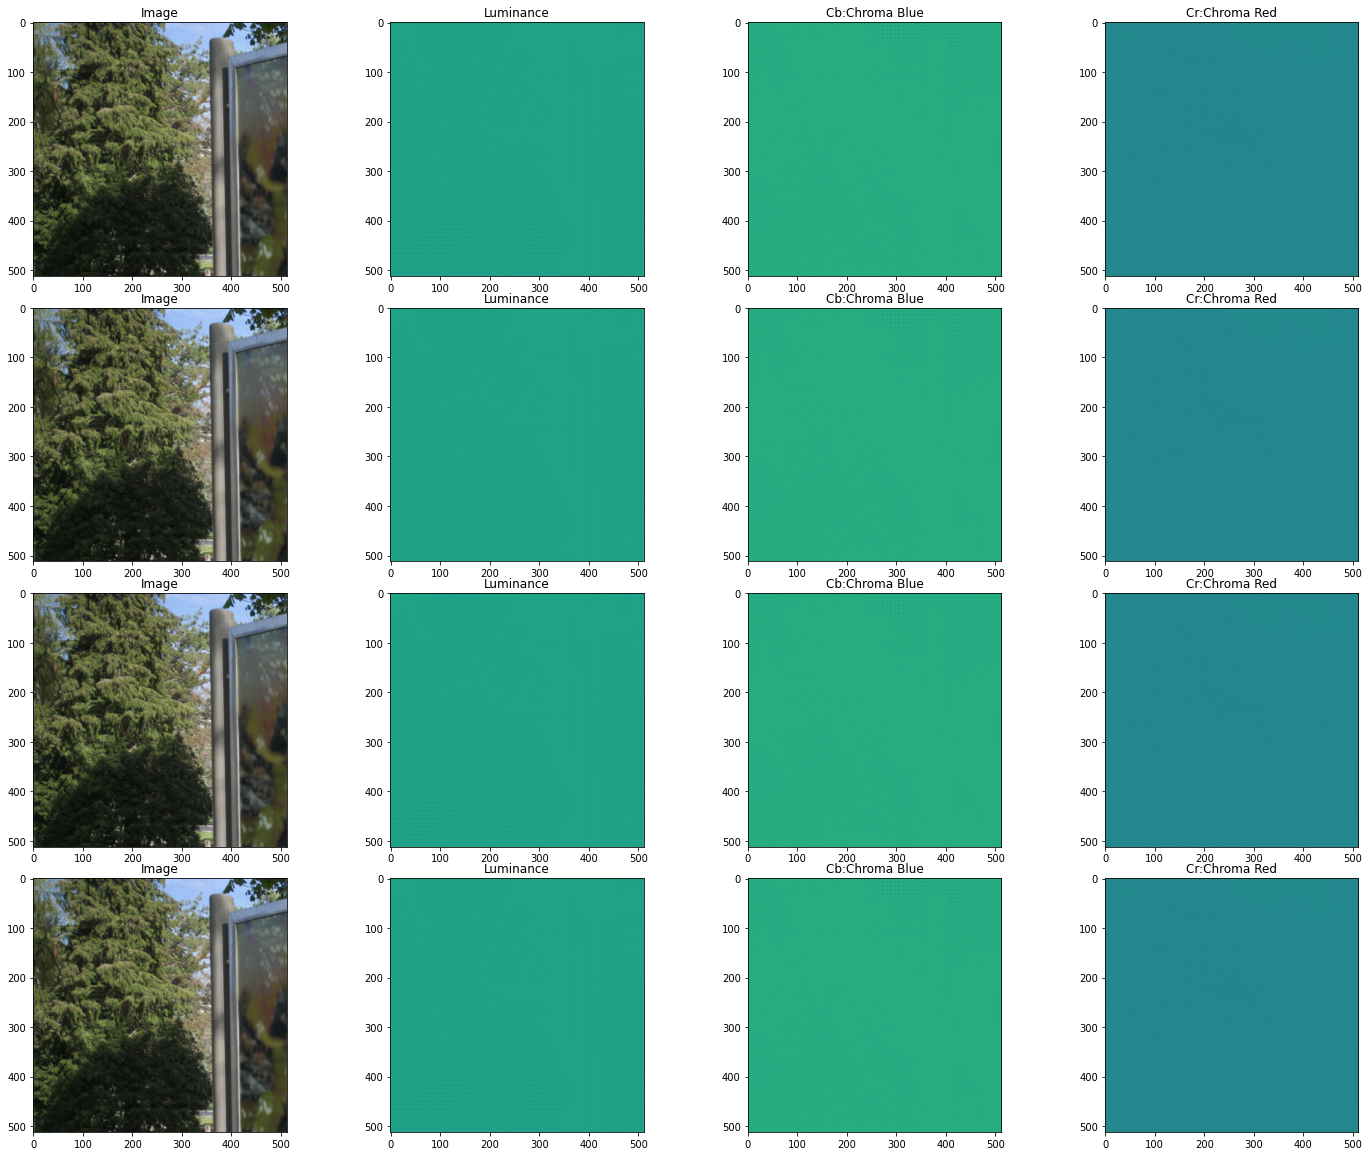

In [23]:
fig,ax = plt.subplots(4,4,figsize=(20,16))
plt.tight_layout()

for i,path in enumerate([cover_images_path[0],JUNIWARD_images_path[0],JMIPOD_images_path[0],UERD_images_path[0]]):
    
    image = Image.open(path)
    jpeg = jio.read(path)
    DCT_Y = jpeg.coef_arrays[0]
    DCT_Cr = jpeg.coef_arrays[1]
    DCT_Cb = jpeg.coef_arrays[2]
    
    
    ax[i,0].imshow(image)
    ax[i,0].set_title('Image')
    ax[i,1].imshow(DCT_Y)
    ax[i,1].set_title('Luminance')
    ax[i,2].imshow(DCT_Cb)
    ax[i,2].set_title('Cb:Chroma Blue')
    ax[i,3].imshow(DCT_Cr)
    ax[i,3].set_title('Cr:Chroma Red')

In [24]:
coverDCT = np.zeros([512,512,3])
stegoDCT = np.zeros([512,512,3])
jpeg = jio.read(cover_images_path[0])
stego_juni = jio.read(JUNIWARD_images_path[0])

5883
[-1.  0.  1.]


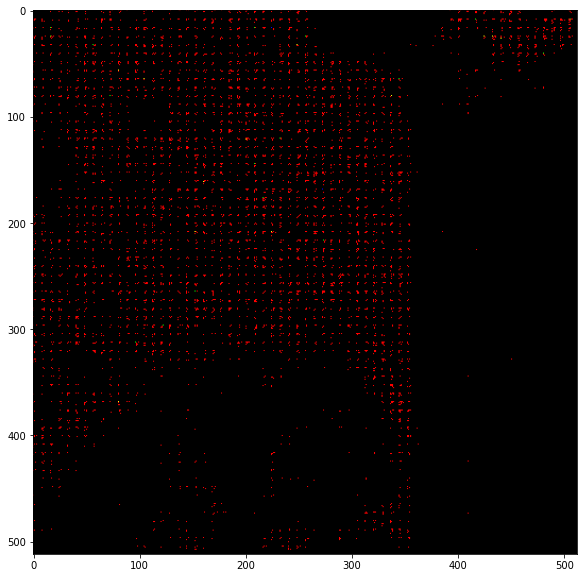

In [25]:
coverDCT[:,:,0] = jpeg.coef_arrays[0] ; coverDCT[:,:,1] = jpeg.coef_arrays[1] ; coverDCT[:,:,2] = jpeg.coef_arrays[2]
stegoDCT[:,:,0] = stego_juni.coef_arrays[0] ; stegoDCT[:,:,1] = stego_juni.coef_arrays[1] ; stegoDCT[:,:,2] = stego_juni.coef_arrays[2]

DCT_diff = coverDCT - stegoDCT
# So since they are not the same Images the DCT_diff would not be zero
print(len(DCT_diff[np.where(DCT_diff!=0)]))
print(np.unique(DCT_diff))
plt.figure(figsize=(16,10))
plt.imshow( abs(DCT_diff) )
plt.show()

161125
[-4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


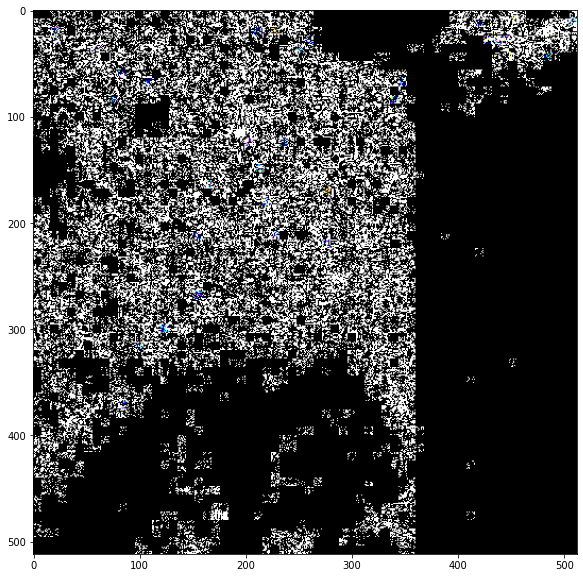

In [26]:
coverPixels = np.array(Image.open(cover_images_path[0])).astype('float')
stegoPixels = np.array(Image.open(JUNIWARD_images_path[0])).astype('float')

pixelsDiff = coverPixels - stegoPixels

# So since they are not the same Images the pixels_diff would not be zero
print(len(pixelsDiff[np.where(pixelsDiff!=0)]))
print(np.unique(pixelsDiff))
plt.figure(figsize=(16,10))
plt.imshow( abs(pixelsDiff) )
plt.show()

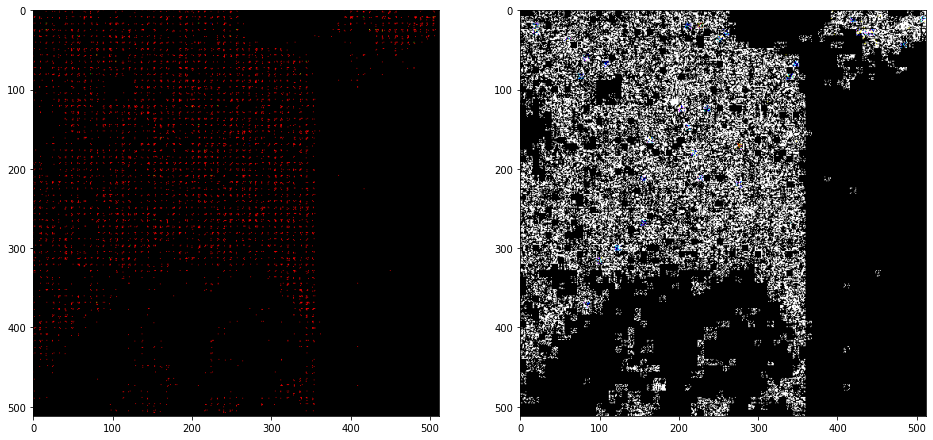

In [27]:
fig,ax = plt.subplots(1,2,figsize=(16,12))
ax[0].imshow(abs(DCT_diff))
ax[1].imshow(abs(pixelsDiff))